In [1]:
import pandas as pd
import sqlite3

In [2]:
connection = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
pd.io.sql.read_sql("SELECT * FROM pageviews;", connection)

,index,uid,datetime
0,0,admin_1,2020-04-17 12:01:08.463179
1,1,admin_1,2020-04-17 12:01:23.743946
2,2,admin_3,2020-04-17 12:17:39.287778
3,3,admin_3,2020-04-17 12:17:40.001768
4,4,admin_1,2020-04-17 12:27:30.646665
...,...,...,...
1075,1075,user_25,2020-05-21 23:23:49.995349
1076,1076,admin_1,2020-05-21 23:49:22.386789
1077,1077,admin_1,2020-05-22 10:36:14.662600
1078,1078,user_5,2020-05-22 11:30:18.368990


In [4]:
query = """
SELECT datetime
FROM pageviews
WHERE uid LIKE 'user_%';
"""
data = pd.read_sql_query(query, connection)
data.head()

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144


In [5]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
data['date'] = data['datetime'].dt.date

In [7]:
visits = data.groupby('date').size().reset_index(name='views')
visits.head()

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1


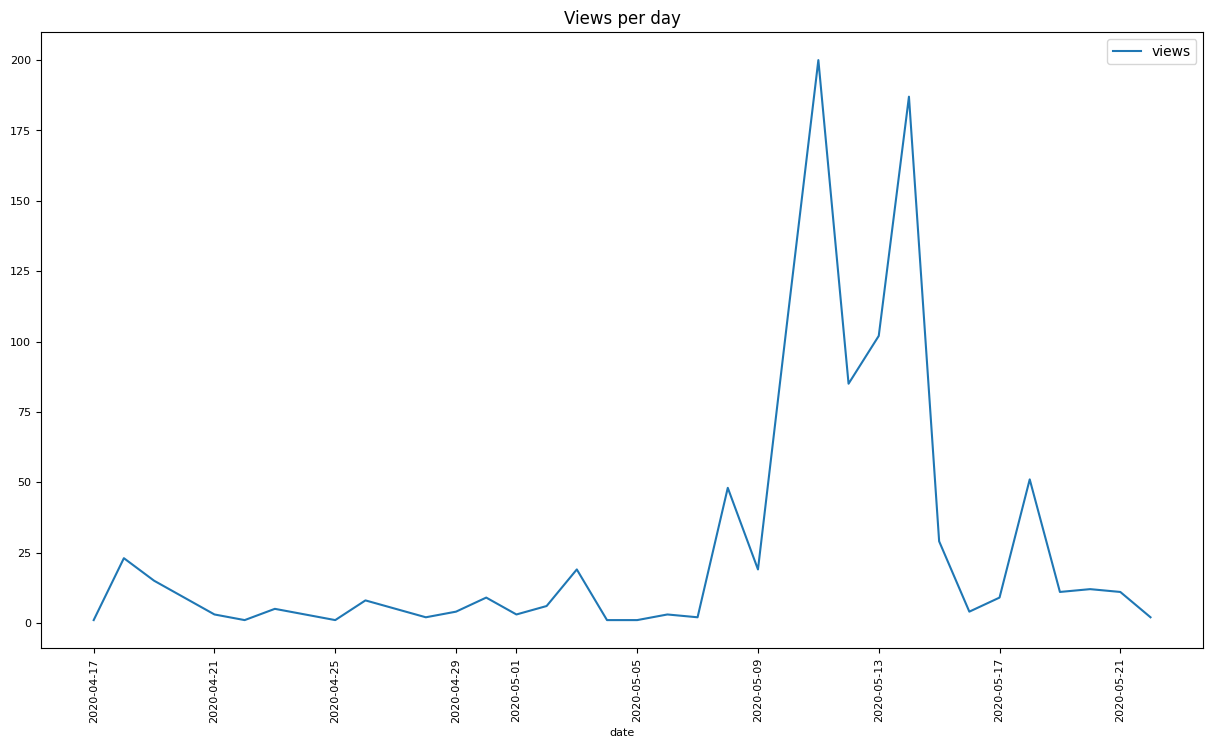

In [8]:
ax = visits.plot(
    x='date', 
    y='views', 
    kind='line', 
    figsize=(15, 8), 
    title='Views per day', 
    legend='views'
)
ax.set_xlabel('date', fontsize=8)
ax.tick_params(axis='x', labelrotation=90, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

In [10]:
connection.close()